<a href="https://colab.research.google.com/github/mazibazi/dataScienceGeo/blob/main/clusterMap_Nspt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import Lib and Storage

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import folium
import branca
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetNAFill.csv'
dfCluster = pd.read_csv(path)
dfCluster.head()

,Unnamed: 0,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address
0,1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes
1,2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes
2,3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes
3,6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel
4,7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel


In [ ]:
dfCluster.rename( columns={'Unnamed: 0':'locationId'}, inplace=True )

# Map Clsuter

## Step  one_Finding

[Refrence](https://medium.datadriveninvestor.com/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163)

In [ ]:
# Variable with the Longitude and Latitude Based on locationId ass A key
X=dfCluster.loc[:,['locationId','Latitude','Longitude']]
X.head(10)

,locationId,Latitude,Longitude
0,1,37.360790,-5.988427
1,2,37.360790,-5.988427
2,3,37.360790,-5.988427
3,6,37.390850,-6.010817
4,7,37.390850,-6.010817
5,8,37.390850,-6.010817
6,14,37.401232,-5.962946
7,15,37.401232,-5.962946
8,16,37.401232,-5.962946
9,19,37.359260,-5.986087


### Elbow Methods

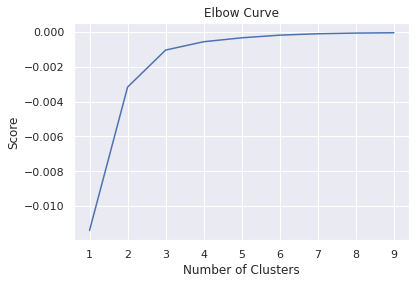

In [ ]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dfCluster[['Latitude']]
X_axis = dfCluster[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Develop Cluster 

In [ ]:
kmeans = KMeans(n_clusters = 6, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

,locationId,Latitude,Longitude,cluster_label
0,1,37.360790,-5.988427,2
1,2,37.360790,-5.988427,2
2,3,37.360790,-5.988427,2
3,6,37.390850,-6.010817,5
4,7,37.390850,-6.010817,5
5,8,37.390850,-6.010817,5
6,14,37.401232,-5.962946,3
7,15,37.401232,-5.962946,3
8,16,37.401232,-5.962946,3
9,19,37.359260,-5.986087,2


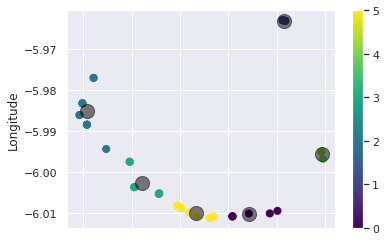

In [ ]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
X = X[['locationId','cluster_label']]
X.head(5)

,locationId,cluster_label
0,1,2
1,2,2
2,3,2
3,6,5
4,7,5


In [ ]:
clustered_data = dfCluster.merge(X, left_on='locationId', right_on='locationId')
clustered_data.head(5)

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2
1,2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2
2,3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2
3,6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5
4,7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5


## Step two_Drawing

[Refrence ](https://medium.com/thelorry-product-tech-data/the-clustering-algorithm-with-geolocation-data-d6dd07ed36a)


In [ ]:
clustered_data.head()

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,9.0,9.6,Clay,23.00,1.818,32.8340,20.0,23.00,0.100000,26.50,127.475,0.49,0.49,-5.988427,37.36079,Av. Reina Mercedes,2
1,2,S1_TI-2C,23.5,24.1,Sand,30.31,2.006,35.9767,31.0,30.31,0.254000,50.15,198.799,0.20,0.20,-5.988427,37.36079,Av. Reina Mercedes,2
2,3,S1_TI-2C,29.5,30.1,Sand,23.50,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.47,0.47,-5.988427,37.36079,Av. Reina Mercedes,2
3,6,S1_TVII-2,7.2,7.8,Clay,23.64,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.18,0.18,-6.010817,37.39085,C/ Odiel,5
4,7,S1_TVII-2,9.7,10.3,Clay,23.14,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.52,0.52,-6.010817,37.39085,C/ Odiel,5


In [ ]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', \
     'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue', \
     'darkpurple', 'pink', 'lightblue', 'lightgreen', 'gray', \
     'black', 'lightgray', 'red', 'blue', 'green', 'purple', \
     'orange', 'darkred', 'lightred', 'beige', 'darkblue', \
     'darkgreen', 'cadetblue', 'darkpurple','pink', 'lightblue', \
     'lightgreen', 'gray', 'black', 'lightgray' ]
  

In [ ]:
from folium.map import Popup
location = clustered_data['Latitude'].mean(), clustered_data['Longitude'].mean()
mapCluster = folium.Map(location=location,zoom_start=15)

for _, row in clustered_data.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"],row["Longitude"]],
        radius=12, 
        weight=2, 
        fill=True, 
        popup = "Nspt: "+str(row['Nspt'])+"\nCu: "+ str(round(row['CuNew'],3))+"\nSoil: "+ str(row['Soil']),
        fill_color=colors[int(row["cluster_label"])],
        tooltip= str(row['Code']),
        color=colors[int(row["cluster_label"])]
    ).add_to(mapCluster)
mapCluster

In [ ]:
BasicPath = "/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/mapAndReports/"
mapCluster.save(BasicPath+"mapFillNA_ClaySand.html")

In [ ]:
pathSave = '/content/gdrive/MyDrive/Colab Notebooks/dataAnalySPT/datasetSelectedLine4SoilPro_ClsuterLoc.csv'
with open(pathSave, 'w', encoding = 'utf-8-sig') as f:
  clustered_data.to_csv(f)

# Split Area based on Cluster

In [ ]:
clusterName = clustered_data.cluster_label.unique()
clusterName

array([2, 5, 3, 4, 0, 1], dtype=int32)

create a data frame dictionary to store your data frames

In [ ]:
DataFrameDict = {elem : pd.DataFrame() for elem in clusterName}
DataFrameDict

{0: Empty DataFrame
 Columns: []
 Index: [], 1: Empty DataFrame
 Columns: []
 Index: [], 2: Empty DataFrame
 Columns: []
 Index: [], 3: Empty DataFrame
 Columns: []
 Index: [], 4: Empty DataFrame
 Columns: []
 Index: [], 5: Empty DataFrame
 Columns: []
 Index: []}

In [ ]:
for key in DataFrameDict.keys():
    DataFrameDict[key] = clustered_data[:][clustered_data.cluster_label == key]

## Cluster 0

In [ ]:
dfClsuter0 = DataFrameDict[0]
dfClsuter0

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
22,53,SP16,5.0,5.6,Clay,20.3900,1.960,31.6912,16.0,20.39,0.044000,17.90,101.539,0.420000,0.42,-6.005210,37.375729,Calle Niebla,0
23,54,SP16,14.0,14.6,Sand,34.2625,NaN,34.2625,25.0,NaN,0.170000,37.25,159.895,0.170000,NaN,-6.005210,37.375729,Calle Niebla,0
24,60,SP17,5.0,5.6,Clay,27.8000,1.890,NaN,NaN,27.80,NaN,NaN,NaN,0.100000,0.10,-6.003685,37.370576,Calle Alfonso Borbon,0
25,61,SP17,11.0,11.6,Clay,20.0300,NaN,31.1198,14.0,20.03,0.016000,13.60,88.571,0.130000,0.13,-6.003685,37.370576,Calle Alfonso Borbon,0
26,62,SP17,14.0,14.6,Sand,32.8340,NaN,32.8340,20.0,NaN,0.100000,26.50,127.475,0.100000,NaN,-6.003685,37.370576,Calle Alfonso Borbon,0
27,67,S1_TVIII-1,12.1,12.7,Sand,31.1198,NaN,31.1198,14.0,NaN,0.016000,13.60,88.571,0.138681,NaN,-5.997485,37.369618,C/ Antonio Bienvenida (Feria),0
28,68,S1_TVIII-1,19.5,20.1,Sand,17.8900,1.993,34.8339,27.0,17.89,0.198000,41.55,172.863,0.520000,0.52,-5.997485,37.369618,C/ Antonio Bienvenida (Feria),0
33,80,S3_TVIII-1,8.0,8.6,Clay,22.8900,1.955,NaN,NaN,22.89,NaN,NaN,NaN,0.600000,0.60,-5.994372,37.364774,Puerto de Sevilla,0
42,116,S9_TVII-2,4.0,4.6,Sand,28.0000,NaN,28.0000,4.0,NaN,0.241989,-7.90,23.731,0.241989,NaN,-6.005359,37.375627,C/ Santa Fe,0


### Data Describe 

In [ ]:
dfClsuter0.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,9.000000,7.000000,9.000000
mean,26.135144,17.142857,0.268963
std,6.029279,7.755183,0.193429
min,17.890000,4.000000,0.100000
25%,20.390000,14.000000,0.130000
50%,27.800000,16.000000,0.170000
75%,31.119800,22.500000,0.420000
max,34.262500,27.000000,0.600000


### Box plot 

In [ ]:
figC0 = go.Figure()
figC0.add_trace(go.Box(y=dfClsuter0["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC0.add_trace(go.Box(y=dfClsuter0["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC0.add_trace(go.Box(y=dfClsuter0["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC0.show()

## Cluster 1

In [ ]:
dfClsuter1 = DataFrameDict[1]
dfClsuter1

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
38,101,S2_TV-2,7.0,7.6,Sand,10.8100,2.06,NaN,NaN,10.81,NaN,NaN,NaN,0.590000,0.59,-5.994999,37.409252,Av. Alvaro Alonso,1
39,102,S2_TV-2,10.0,10.6,Sand,29.9770,NaN,29.9770,10.0,NaN,0.638699,5.00,62.635,0.638699,NaN,-5.994999,37.409252,Av. Alvaro Alonso,1
40,108,S3_TV-2,4.0,4.6,Sand,30.2627,1.90,30.2627,11.0,NaN,0.704818,7.15,69.119,0.704818,NaN,-5.996847,37.409546,C/ J. Bautista Muñoz,1


### Data Describe 

In [ ]:
dfClsuter1.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,3.000000,2.000000,3.000000
mean,23.683233,10.500000,0.644506
std,11.149462,0.707107,0.057629
min,10.810000,10.000000,0.590000
25%,20.393500,10.250000,0.614350
50%,29.977000,10.500000,0.638699
75%,30.119850,10.750000,0.671758
max,30.262700,11.000000,0.704818


### Box plot

In [ ]:
figC1 = go.Figure()
figC1.add_trace(go.Box(y=dfClsuter1["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC1.add_trace(go.Box(y=dfClsuter1["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC1.add_trace(go.Box(y=dfClsuter1["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC1.show()

## Cluster 2

In [ ]:
dfClsuter2 = DataFrameDict[2]
dfClsuter2

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
0,1,S1_TI-2C,9.0,9.6,Clay,23.0000,1.818,32.8340,20.0,23.00,0.100,26.50,127.475,0.490,0.49,-5.988427,37.360790,Av. Reina Mercedes,2
1,2,S1_TI-2C,23.5,24.1,Sand,30.3100,2.006,35.9767,31.0,30.31,0.254,50.15,198.799,0.200,0.20,-5.988427,37.360790,Av. Reina Mercedes,2
2,3,S1_TI-2C,29.5,30.1,Sand,23.5000,2.050,NaN,NaN,23.50,NaN,NaN,NaN,0.470,0.47,-5.988427,37.360790,Av. Reina Mercedes,2
9,19,S2_TI-1b,6.0,6.6,Clay,26.6400,NaN,NaN,NaN,26.64,NaN,NaN,NaN,0.050,0.05,-5.986087,37.359260,"Reina Mercedes, Luca de Tena",2
10,20,S2_TI-1b,12.0,12.6,Clay,36.2624,NaN,36.2624,32.0,NaN,0.268,52.30,205.283,0.268,NaN,-5.986087,37.359260,"Reina Mercedes, Luca de Tena",2
11,24,S4_TI-1b,4.0,4.6,Clay,15.6500,NaN,NaN,NaN,15.65,NaN,NaN,NaN,0.820,0.82,-5.977018,37.362171,Hosp. Virgen del Rocío,2
12,27,S4_TI-1b,17.5,18.1,Sand,36.5481,NaN,36.5481,33.0,NaN,0.282,54.45,211.767,0.282,NaN,-5.977018,37.362171,Hosp. Virgen del Rocío,2
13,31,S9_TI-1b,7.0,7.6,Clay,13.6000,NaN,NaN,NaN,13.60,NaN,NaN,NaN,0.530,0.53,-5.983228,37.359866,C/ Marques Luca de Tena,2
14,32,S9_TI-1b,16.0,16.6,Sand,27.2200,NaN,NaN,NaN,27.22,NaN,NaN,NaN,0.340,0.34,-5.983228,37.359866,C/ Marques Luca de Tena,2
15,33,S9_TI-1b,19.0,19.6,Sand,35.1196,NaN,35.1196,28.0,NaN,0.212,43.70,179.347,0.212,NaN,-5.983228,37.359866,C/ Marques Luca de Tena,2


### Data Describe 

In [ ]:
dfClsuter2.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,10.000000,5.000000,10.000000
mean,26.785010,28.800000,0.366200
std,8.097946,5.263079,0.217988
min,13.600000,20.000000,0.050000
25%,23.125000,28.000000,0.226000
50%,26.930000,31.000000,0.311000
75%,33.917200,32.000000,0.485000
max,36.548100,33.000000,0.820000


### Box plot

In [ ]:
figC2 = go.Figure()
figC2.add_trace(go.Box(y=dfClsuter2["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC2.add_trace(go.Box(y=dfClsuter2["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC2.add_trace(go.Box(y=dfClsuter2["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC2.show()

## Cluster 3

In [ ]:
dfClsuter3 = DataFrameDict[3]
dfClsuter3

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
6,14,S5_TIII-1B,7.6,8.2,Clay,25.4600,1.965,36.2624,32.0,25.46,0.268,52.30,205.283,0.360,0.36,-5.962946,37.401232,Av. Kansas City,3
7,15,S5_TIII-1B,13.0,13.6,Sand,38.8337,NaN,38.8337,41.0,NaN,0.394,71.65,263.639,0.394,NaN,-5.962946,37.401232,Av. Kansas City,3
8,16,S5_TIII-1B,19.0,19.6,Sand,40.8336,NaN,40.8336,48.0,NaN,0.492,86.70,309.027,0.492,NaN,-5.962946,37.401232,Av. Kansas City,3
16,36,S6_TIII-1b,8.0,8.6,Clay,31.1000,1.960,NaN,NaN,31.10,NaN,NaN,NaN,0.210,0.21,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,3
17,37,S6_TIII-1b,10.0,10.6,Sand,16.9900,1.920,NaN,NaN,16.99,NaN,NaN,NaN,1.120,1.12,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,3
18,38,S6_TIII-1b,12.0,12.6,Sand,31.9300,NaN,32.8340,20.0,31.93,0.100,26.50,127.475,0.520,0.52,-5.963096,37.401742,Renfe/Kansas City/Tesalonica,3


### Data Describe 

In [ ]:
dfClsuter3.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,6.000000,4.000000,6.000000
mean,30.857883,35.250000,0.516000
std,8.783985,12.093387,0.315678
min,16.990000,20.000000,0.210000
25%,26.870000,29.000000,0.368500
50%,31.515000,36.500000,0.443000
75%,37.107775,42.750000,0.513000
max,40.833600,48.000000,1.120000


### Box plot

In [ ]:
figC3 = go.Figure()
figC3.add_trace(go.Box(y=dfClsuter3["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC3.add_trace(go.Box(y=dfClsuter3["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC3.add_trace(go.Box(y=dfClsuter3["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC3.show()

## Cluster 4

In [ ]:
dfClsuter4 = DataFrameDict[4]
dfClsuter4

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
20,47,S7_TVII-2,7.0,7.6,Clay,13.8700,NaN,NaN,NaN,13.87,NaN,NaN,NaN,0.410,0.41,-6.010905,37.386979,Ronda Triana,4
21,48,S7_TVII-2,11.0,11.6,Sand,32.2626,NaN,32.2626,18.0,NaN,0.072,22.20,114.507,0.072,NaN,-6.010905,37.386979,Ronda Triana,4
29,73,S2_TVII-2,4.0,4.6,Clay,23.7800,2.006,32.8340,20.0,23.78,0.100,26.50,127.475,0.330,0.33,-6.011196,37.386229,Ronda Triana,4
30,74,S2_TVII-2,10.0,10.6,Sand,27.6800,1.895,33.9768,24.0,27.68,0.156,35.10,153.411,0.190,0.19,-6.011196,37.386229,Ronda Triana,4
31,75,S2_TVII-2,17.0,17.6,Sand,34.5482,NaN,34.5482,26.0,NaN,0.184,39.40,166.379,0.184,NaN,-6.011196,37.386229,Ronda Triana,4
32,76,S2_TVII-2,20.0,20.6,Sand,49.9760,NaN,49.9760,80.0,NaN,0.940,155.50,516.515,0.940,NaN,-6.011196,37.386229,Ronda Triana,4
34,87,S4_TVII-2,5.6,6.1,Sand,31.9700,2.043,35.6910,30.0,31.97,0.240,48.00,192.315,0.190,0.19,-6.008259,37.379477,Lopez de Gomara,4
35,88,S4_TVII-2,15.0,15.6,Sand,36.5481,NaN,36.5481,33.0,NaN,0.282,54.45,211.767,0.282,NaN,-6.008259,37.379477,Lopez de Gomara,4
36,89,S4_TVII-2,18.0,18.6,Sand,35.4053,NaN,35.4053,29.0,NaN,0.226,45.85,185.831,0.226,NaN,-6.008259,37.379477,Lopez de Gomara,4
37,93,S8_TVII-2,10.0,10.6,Sand,32.0200,1.980,NaN,NaN,32.02,NaN,NaN,NaN,0.100,0.10,-6.009896,37.381862,Ronda Triana,4


### Data Describe 

In [ ]:
dfClsuter4.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,13.000000,10.000000,13.000000
mean,29.680108,29.000000,0.289077
std,11.253288,18.997076,0.250087
min,3.500000,14.000000,0.044000
25%,27.680000,18.500000,0.160000
50%,32.020000,25.000000,0.190000
75%,34.548200,29.750000,0.330000
max,49.976000,80.000000,0.940000


### Box plot

In [ ]:
figC4 = go.Figure()
figC4.add_trace(go.Box(y=dfClsuter4["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC4.add_trace(go.Box(y=dfClsuter4["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC4.add_trace(go.Box(y=dfClsuter4["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC4.show()

## Cluster 5

In [ ]:
dfClsuter5 = DataFrameDict[5]
dfClsuter5

,locationId,Code,DepthUp,DepthDown,Soil,PhiNew,Density,phiF,Nspt,Phi,C3,C2,C1,CuNew,Cu,Longitude,Latitude,Address,cluster_label
3,6,S1_TVII-2,7.2,7.8,Clay,23.6400,2.156,29.9770,10.0,23.64,0.638699,5.00,62.635,0.180,0.18,-6.010817,37.390850,C/ Odiel,5
4,7,S1_TVII-2,9.7,10.3,Clay,23.1400,2.063,NaN,NaN,23.14,NaN,NaN,NaN,0.520,0.52,-6.010817,37.390850,C/ Odiel,5
5,8,S1_TVII-2,14.0,14.6,Sand,24.4200,1.875,34.8339,27.0,24.42,0.198000,41.55,172.863,0.260,0.26,-6.010817,37.390850,C/ Odiel,5
19,44,S4_TVI-1,10.0,10.6,Sand,31.6912,NaN,31.6912,16.0,NaN,0.044000,17.90,101.539,0.044,NaN,-6.010093,37.398565,C/ Americo Vespucio,5
45,125,SP14,5.0,5.6,Clay,33.5300,2.020,NaN,NaN,33.53,NaN,NaN,NaN,0.180,0.18,-6.009466,37.400143,Charles Darwin,5
46,130,SP15,7.0,7.6,Clay,22.2100,2.100,31.6912,16.0,22.21,0.044000,17.90,101.539,0.710,0.71,-6.010119,37.394234,Puerta Triana,5


### Data Describe 

In [ ]:
dfClsuter5.iloc[:,[5,8,-6]].describe()

,PhiNew,Nspt,CuNew
count,6.000000,4.000000,6.000000
mean,26.438533,17.250000,0.315667
std,4.869219,7.088723,0.249385
min,22.210000,10.000000,0.044000
25%,23.265000,14.500000,0.180000
50%,24.030000,16.000000,0.220000
75%,29.873400,18.750000,0.455000
max,33.530000,27.000000,0.710000


### Box plot

In [ ]:
figC5 = go.Figure()
figC5.add_trace(go.Box(y=dfClsuter5["Nspt"], name='Nspt',
                marker_color = 'indianred'))
figC5.add_trace(go.Box(y=dfClsuter5["PhiNew"], name = 'Frinction Angle',
                marker_color = 'lightseagreen'))
figC5.add_trace(go.Box(y=dfClsuter5["CuNew"], name = 'Cohesion',
                marker_color = 'Blue'))

figC5.show()

## Compare Cluster location to one another

### Cohesion Vs Cluster

In [ ]:
N = 6     # Number of boxes
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

In [ ]:
figCC = go.Figure()
figCC.add_trace(go.Box(y=dfClsuter0["CuNew"], name='Cohesion_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter1["CuNew"], name='Cohesion_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter2["CuNew"], name='Cohesion_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter3["CuNew"], name='Cohesion_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter4["CuNew"], name='Cohesion_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCC.add_trace(go.Box(y=dfClsuter5["CuNew"], name='Cohesion_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCC.show()

#### Cohesion of Sand_Alone

In [ ]:
dfClsuter0_S = dfClsuter0[dfClsuter0["Soil"]=="Sand"]
dfClsuter1_S = dfClsuter1[dfClsuter1["Soil"]=="Sand"]
dfClsuter2_S = dfClsuter2[dfClsuter2["Soil"]=="Sand"]
dfClsuter3_S = dfClsuter3[dfClsuter3["Soil"]=="Sand"]
dfClsuter4_S = dfClsuter4[dfClsuter4["Soil"]=="Sand"]
dfClsuter5_S = dfClsuter5[dfClsuter5["Soil"]=="Sand"]

figCC_S = go.Figure()
figCC_S.add_trace(go.Box(y=dfClsuter0_S["CuNew"], name='Cohesion_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter1_S["CuNew"], name='Cohesion_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter2_S["CuNew"], name='Cohesion_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter3_S["CuNew"], name='Cohesion_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter4_S["CuNew"], name='Cohesion_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCC_S.add_trace(go.Box(y=dfClsuter5_S["CuNew"], name='Cohesion_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCC_S.show()


### Nspt Vs Cluster

In [ ]:
N = 6     # Number of boxes
c = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, N)]

In [ ]:
figCN = go.Figure()
figCN.add_trace(go.Box(y=dfClsuter0["Nspt"], name='Nspt_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter1["Nspt"], name='Nspt_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter2["Nspt"], name='Nspt_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter3["Nspt"], name='Nspt_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter4["Nspt"], name='Nspt_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCN.add_trace(go.Box(y=dfClsuter5["Nspt"], name='Nspt_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCN.show()

#### Nspt of Sand Alone

In [ ]:
figCN_S = go.Figure()
figCN_S.add_trace(go.Box(y=dfClsuter0_S["Nspt"], name='Nspt_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter1_S["Nspt"], name='Nspt_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter2_S["Nspt"], name='Nspt_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter3_S["Nspt"], name='Nspt_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter4_S["Nspt"], name='Nspt_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCN_S.add_trace(go.Box(y=dfClsuter5_S["Nspt"], name='Nspt_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCN_S.show()

### Friction Angle Vs Cluster

In [ ]:
figCf = go.Figure()
figCf.add_trace(go.Box(y=dfClsuter0["PhiNew"], name='Friction Angle_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter1["PhiNew"], name='Friction Angle_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter2["PhiNew"], name='Friction Angle_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter3["PhiNew"], name='Friction Angle_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter4["PhiNew"], name='Friction Angle_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCf.add_trace(go.Box(y=dfClsuter5["PhiNew"], name='Friction Angle_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCf.show()

#### Friction of Sand Alone

In [ ]:
figCf_S = go.Figure()
figCf_S.add_trace(go.Box(y=dfClsuter0_S["PhiNew"], name='Friction Angle_Cluster0',
                marker_color = c[0], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter1_S["PhiNew"], name='Friction Angle_Cluster1',
                marker_color = c[1], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter2_S["PhiNew"], name='Friction Angle_Cluster2',
                marker_color = c[2], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter3_S["PhiNew"], name='Friction Angle_Cluster3',
                marker_color = c[3], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter4_S["PhiNew"], name='Friction Angle_Cluster4',
                marker_color = c[4], boxpoints='all'))
figCf_S.add_trace(go.Box(y=dfClsuter5_S["PhiNew"], name='Friction Angle_Cluster5',
                marker_color = c[5], boxpoints='all'))

figCf_S.show()